
## GitHub URL: https://github.com/gsahai1x/AIML

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Goal
    Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
## Resources Available
    The historical data for this project is available in file
    https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
>    1. Univariate analysis (12 marks)
>>        a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
>>        b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
>>        c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
>    2. Multivariate analysis (8 marks)
>>        a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
>>        b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots
### Deliverable – 2 (Prepare the data for analytics) – (10)
    1. Ensure the attribute types are correct. If not, take appropriate actions.
    2. Get the data model ready.
    3. Transform the data i.e. scale / normalize if required
    4. Create the training set and test set in ratio of 70:30
### Deliverable – 3 (create the ensemble model) – (30)
    1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
    2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
    Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
    3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)
### Attribute information
#### Input variables:
##### Bank client data:
    1. age: Continuous feature
    2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. marital: marital status (married, single, divorced)
    4. education: education level (primary, secondary, tertiary)
    5. default: has credit in default?
    6. housing: has housing loan?
    7. loan: has personal loan?
    8. balance in account
##### Related to previous contact:
    9. contact: contact communication type
    10. month: last contact month of year
    11. day: last contact day of the month
    12. duration: last contact duration, in seconds*
##### Other attributes:
    13. campaign: number of contacts performed during this campaign and for this client
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
    15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
    16. poutcome: outcome of the previous marketing campaign
##### Output variable (desired target):
    17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

# Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
## Load Libraries

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
num_bins = 10
from sklearn import set_config
set_config(print_changed_only=False)

## Import data

In [3]:
#import dataset
depdata = pd.read_csv('bank-full.csv')
#display first 5
depdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


> Eyeballing data shows that most of the data points are not numbers. There are a lot of 0 values, and some values are in negative. however negative values are explained in the dataset. There are some values which are unknown. Target is the labelled variable. 

## Univariate Analysis

In [4]:
#data types
depdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
#Information on Data related to names, null values, count, and data types
depdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> * None of the data points seem to be null. We need to see how to treat 0s and Unknowns. 
> * There are a total of 45211 entries 17 columns

In [6]:
#No, of rows and columns
depdata.shape

(45211, 17)

> 45211 rows of data and 17 columns

In [7]:
#Get data description on mean, standard deviation, minimum, maximum, 1st quartile, mode or 2nd quartile, and 3rd quartile.
depdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


**Some things to note here are:**
>* 3rd quartile value of Age is 48. Age may be positively skewed.
>* Balance varies from negative to positive.
>* Day can be between 1 and 31. 
>* Duration min value is 0 and it can go up to 4918. This needs to be checked. Seemes like there are outliers. 
>* Seems like there are outliers in campaign. 75% of campaign 3 and max is 63. 
>* At least 75% of customers did not have any contact or did not have any contact in last 900 days after the previous campaign
>* At least 75% of customers in the dataset did not get contacted even a single time for the previous campaign

In [8]:
#null values
depdata.isnull().values.any()

False

> No null values

In [9]:
#check duplicates
dupes = depdata.duplicated()
sum(dupes)

0

> No duplicate values

In [10]:
#Get unique values for each columns
uniquecol = []
for i in depdata:
    uniquecol.append(
        {
            'Column Name' : i,
            'Count Unique' : depdata[i].nunique(),
            'Values': np.sort(depdata[i].unique())
        }
    )
pd.DataFrame(uniquecol)

,Column Name,Count Unique,Values
0,age,77,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
1,job,12,"[admin., blue-collar, entrepreneur, housemaid,..."
2,marital,3,"[divorced, married, single]"
3,education,4,"[primary, secondary, tertiary, unknown]"
4,default,2,"[no, yes]"
5,balance,7168,"[-8019, -6847, -4057, -3372, -3313, -3058, -28..."
6,housing,2,"[no, yes]"
7,loan,2,"[no, yes]"
8,contact,3,"[cellular, telephone, unknown]"
9,day,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


>* age, balance, duration, pdays, and previous seem to be continuous values. 
>* day, campaign, previous look to be continuous values. it needs to be seen if it will be treated as categorical.  

In [11]:
#unique job values
depdata['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

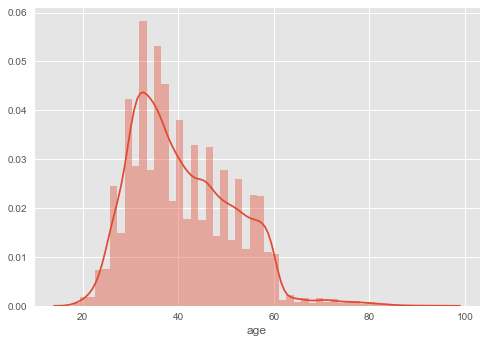

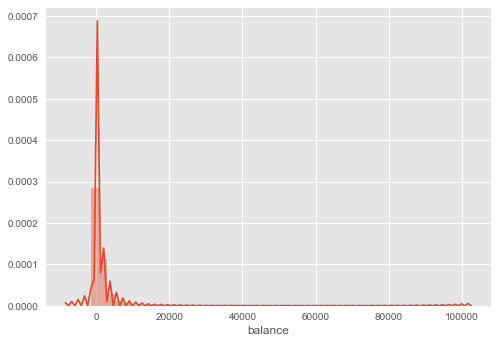

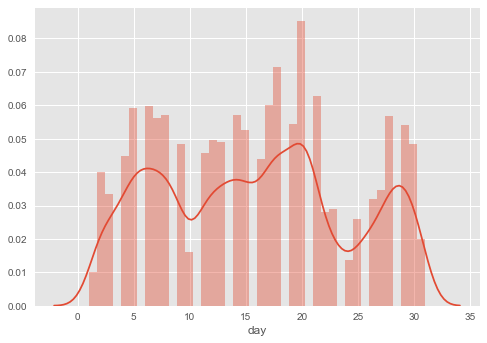

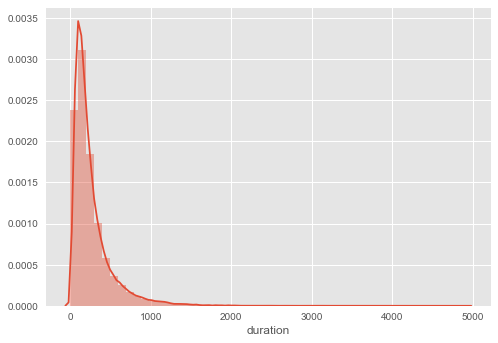

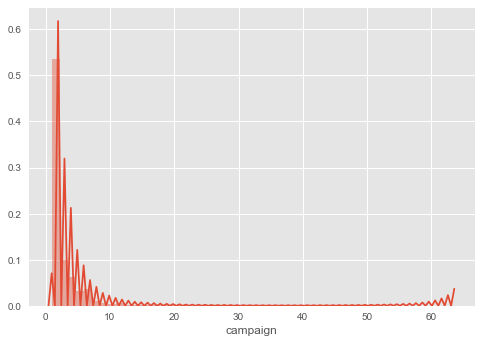

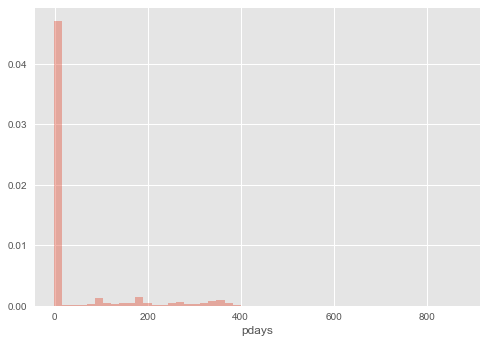

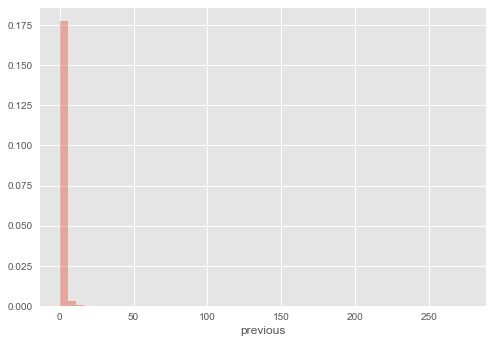

In [12]:
# distplot for continous columns
for i in ['age','balance','day','duration', 'campaign','pdays','previous']:
#age = pd.DataFrame((depdata['age'].value_counts(normalize=True)*100).reset_index())
    ax = sns.distplot(depdata[i])
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    #for ind, label in enumerate(ax.get_xticklabels()):
     #   if ind % 2 == 0:  # every 5th label is kept
      #      label.set_visible(True)
       # else:
        #    label.set_visible(False)
    plt.show()

>* Balance, Duration, Campaign are heavily skewed to the right. 
>* pdays and previous are localized and have a high single value range. 

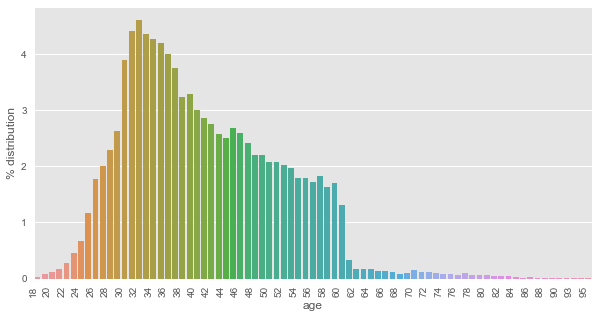

In [13]:
#Age Univariate Analysis
a = pd.DataFrame((depdata['age'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='age', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("age")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* Most of the age is between 25 - 60

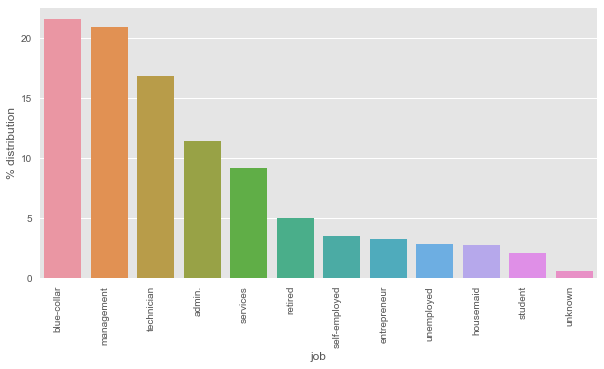

In [14]:
#Job Univariate Analysis
a = pd.DataFrame((depdata['job'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='job', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("job")
plt.ylabel("% distribution")

plt.show()

>* Blue-Collar, Management, Technician make up about 60% of job distribution

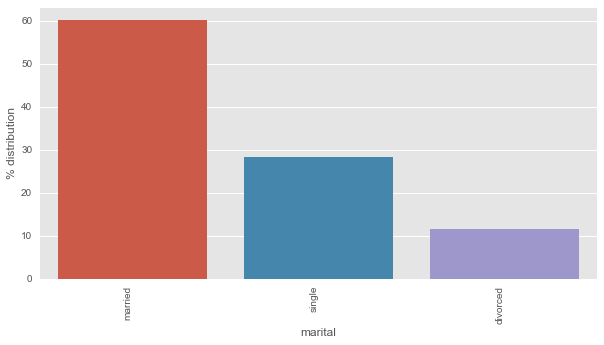

In [15]:
#Marital Univariate Analysis
a = pd.DataFrame((depdata['marital'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='marital', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("marital")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 60% are married

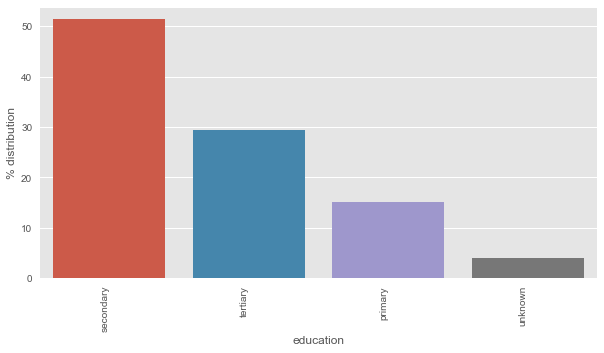

In [16]:
#education univariate analysis
a = pd.DataFrame((depdata['education'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='education', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("education")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 50% of distribution have secondary level education
>* There is an unknown level of education, however, that is not much. Lets see if we need to do something about it.

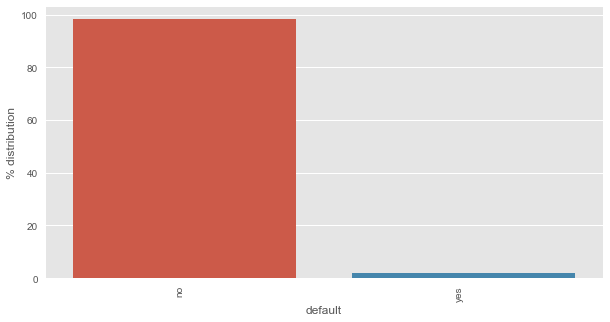

In [17]:
#default univariate analysis
a = pd.DataFrame((depdata['default'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='default', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("default")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 95% of distibution did not default. Only a handful defaulted. Either we can drop this column completely or remove the defaulted ones. It will depend up relation of default to Target. 

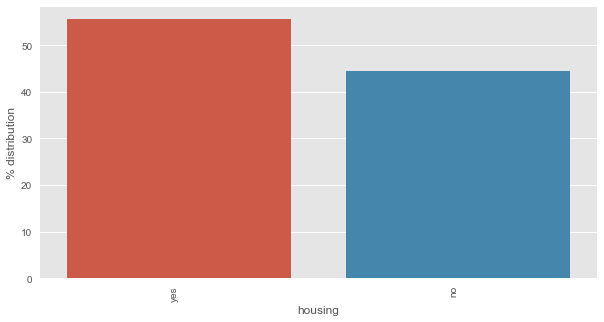

In [18]:
#housing univariate analysis
a = pd.DataFrame((depdata['housing'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='housing', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("housing")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* No specific inferences can be made from housing.

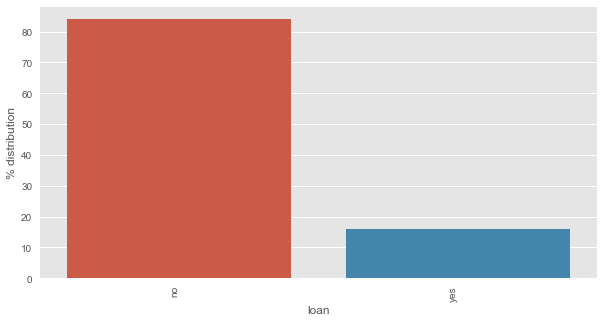

In [19]:
#loan univariate analysis
a = pd.DataFrame((depdata['loan'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='loan', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("loan")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 85% of distribution does not have a personal loan

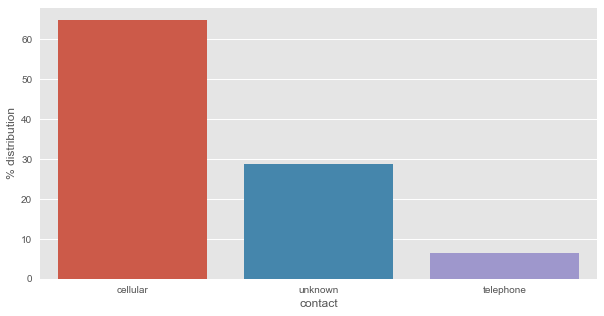

In [20]:
#Univariate contact communication type
a = pd.DataFrame((depdata['contact'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='contact', data=a)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("contact")
plt.ylabel("% distribution")
#for ind, label in enumerate(ax.get_xticklabels()):
#    if ind % 500== 0:  # every 7th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)
plt.show()

>* More than 65% distribution prefer to be contacted by cell.
>* Around 30% of distributions contact preference is unknown.

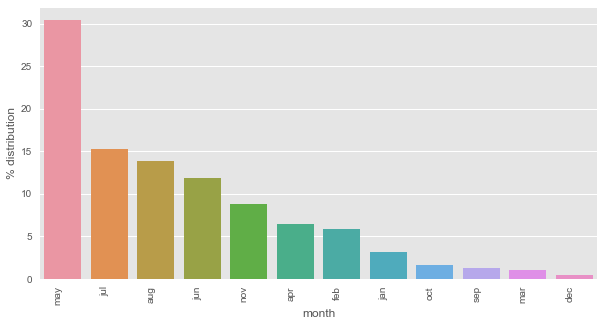

In [21]:
#month univariate analysis
a = pd.DataFrame((depdata['month'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='month', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("month")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 30% of people were contacted in month of May last time. 

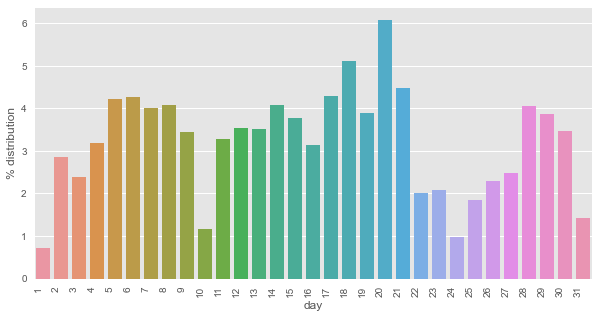

In [22]:
#day univariate analysis
a = pd.DataFrame((depdata['day'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='day', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("day")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* There are no inferences can be made from day data. Just notice that on the 1st, 10th, and 24th day least no. of contacts were made. 

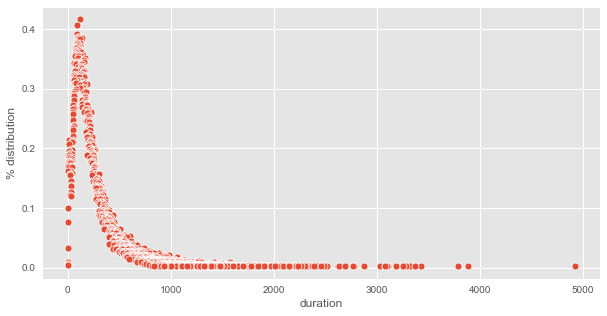

In [23]:
#duration univariate analysis
a = pd.DataFrame((depdata['duration'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.scatterplot(x='index',y='duration', data=a)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("duration")
plt.ylabel("% distribution")
#for ind, label in enumerate(ax.get_xticklabels()):
#    if ind % 100== 0:  # every 7th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)
plt.show()

>* Too much skewness in duration. We can try putting duration in bins. 

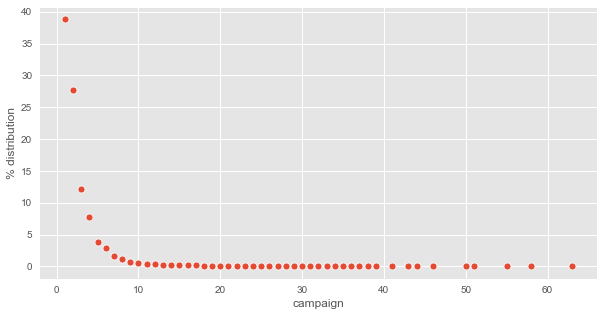

In [24]:
#campaign univariate analysis
a = pd.DataFrame((depdata['campaign'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.scatterplot(x='index',y='campaign', data=a)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("campaign")
plt.ylabel("% distribution")
#for ind, label in enumerate(ax.get_xticklabels()):
#    if ind % 1== 0:  # every 7th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)
plt.show()

>* Positively skewed. Try to put campaign in bins and see if it helps with metrics

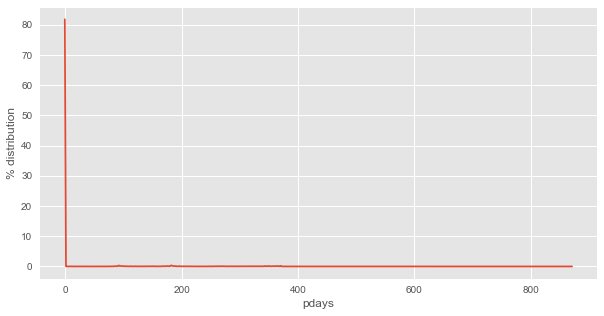

In [25]:
#previous contact days univariate analysis
a = pd.DataFrame((depdata['pdays'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.lineplot(x='index',y='pdays', data=a)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("pdays")
plt.ylabel("% distribution")
#for ind, label in enumerate(ax.get_xticklabels()):
#    if ind % 10== 0:  # every 7th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)
plt.show()

In [26]:
(depdata['pdays'].value_counts(normalize=True)*100).sort_values(ascending=False)

-1     81.74
 182    0.37
 92     0.33
 183    0.28
 91     0.28
        ... 
 437    0.00
 54     0.00
 470    0.00
 854    0.00
 32     0.00
Name: pdays, Length: 559, dtype: float64

>* More than 80% of pdays have a value of -1. We may be able to put them in bins. But it would depend on relation to Target. 
>* number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)

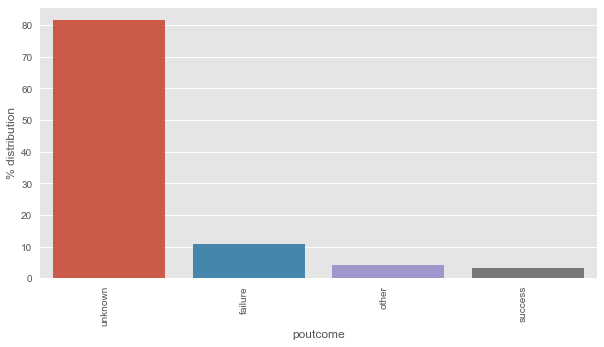

In [27]:
#previous outcome univariate analysis
a = pd.DataFrame((depdata['poutcome'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='poutcome', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("poutcome")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* More than 80% have unknown outcome from previous campaign. This doesnt look to add value. May be we can try dropping this column unless the relationship of previous outcomes of success and failures are very evident. 

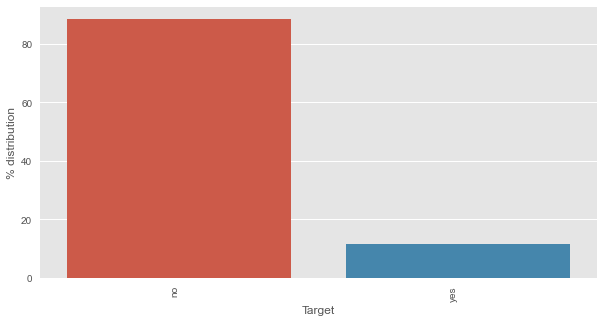

In [28]:
#target output variable univariate analysis
a = pd.DataFrame((depdata['Target'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[10,5])
ax = sns.barplot(x='index',y='Target', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel("Target")
plt.ylabel("% distribution")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 1== 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

>* This is the target variable.

## Univariate Section Summary: 
> * More than 85% of distribution did not have a personal loan
> * More than 95% of distribution did not default. Only a handful defaulted. Either we can drop this column completely or remove the defaulted ones. It will depend up relation of default to Target.
> * More than 80% of pdays have a value of -1. We may be able to put them in bins. But it would depend on relation to Target.
> * More than 80% have unknown outcome from previous campaign. This doesnt look to add value. May be we can try dropping this column unless the relationship of previous outcomes of success and failures are very evident.
> * pdays and previous are localized and high single value ranges.


## Multivariate Analysis

In [29]:
depdata.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


>* Correlation doesn't seem to make a lot of sense in this case as most of the data is categorical. 

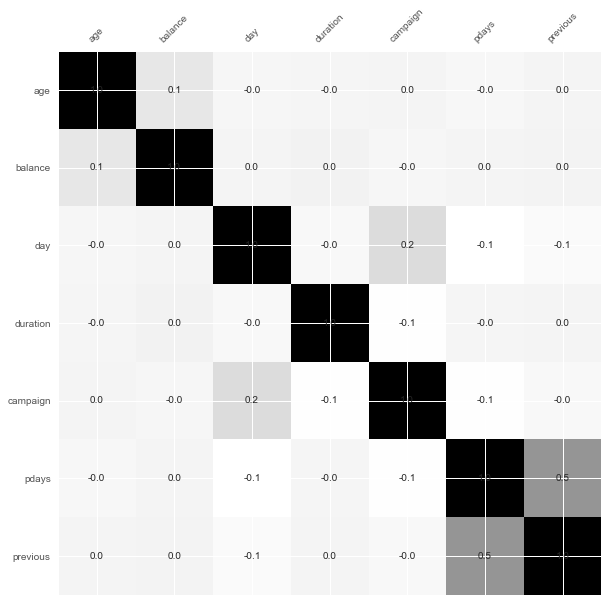

In [30]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(depdata)

>* Correlation doesn't seem to make a lot of sense in this case as most of the data is categorical.

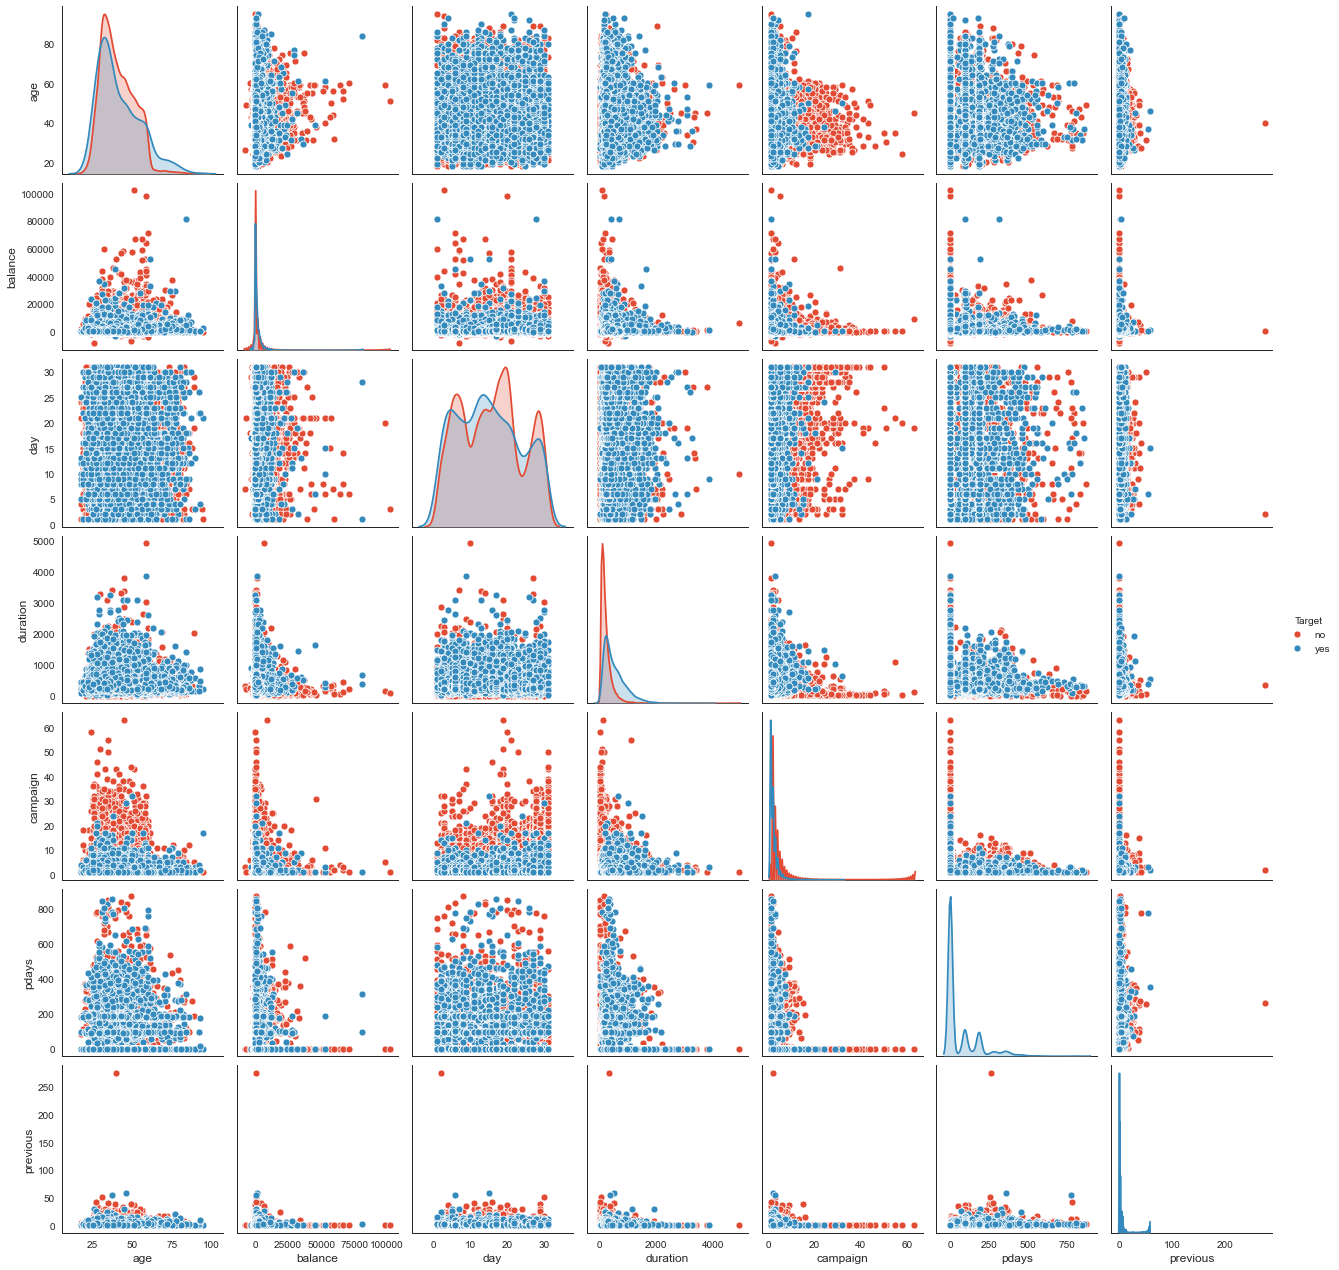

In [31]:
sns.set_style('ticks')
sns.pairplot(depdata,hue="Target")

>* Customers who have had lesser number of contacts during this campaign and previous campaign seem to constitute a higher percentage of population who subscribed to term deposit.

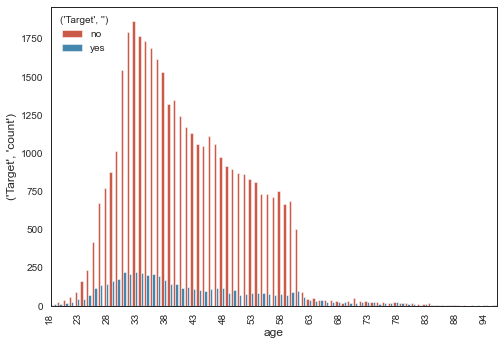

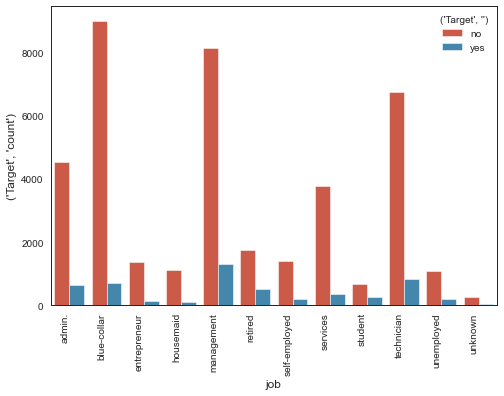

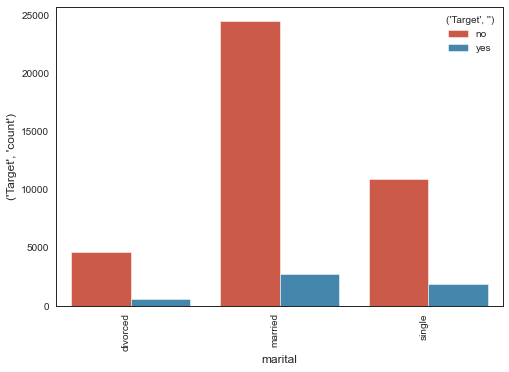

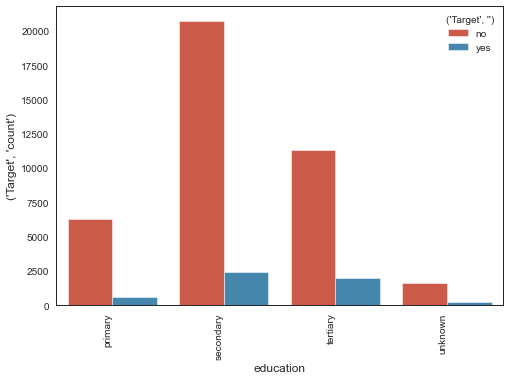

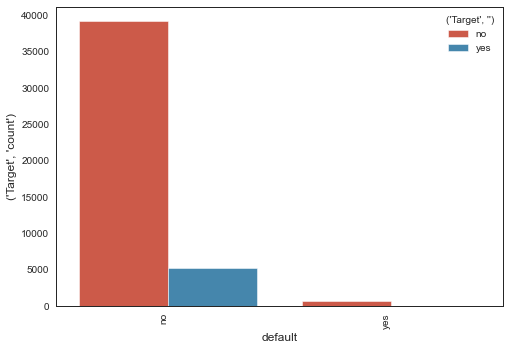

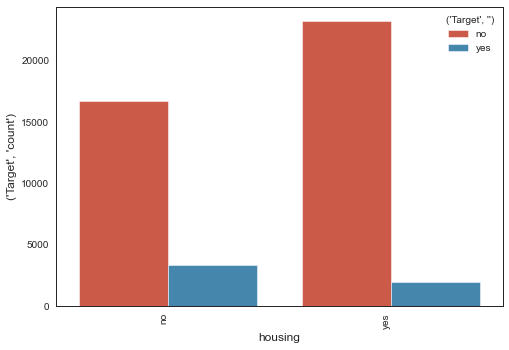

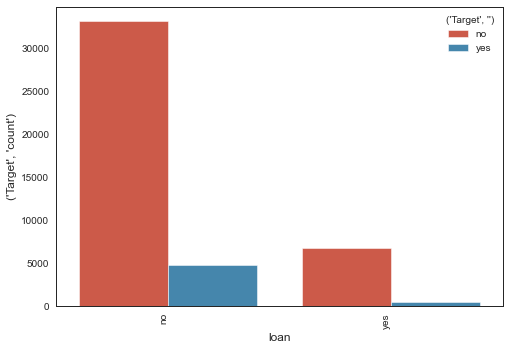

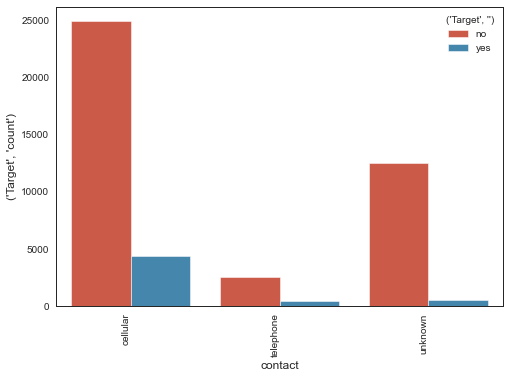

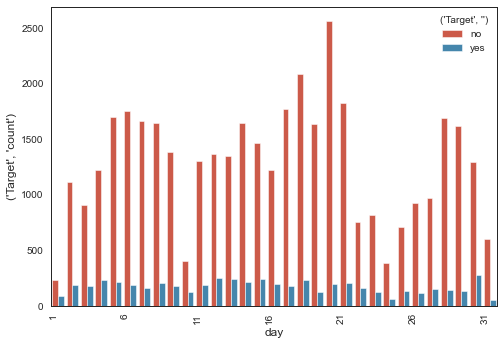

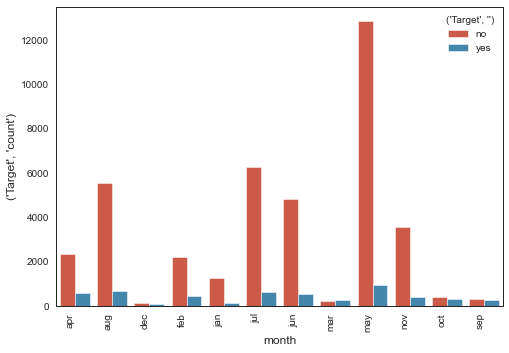

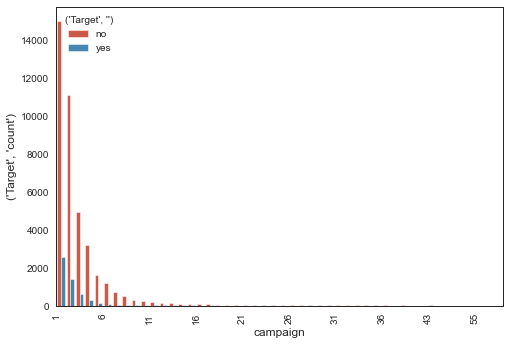

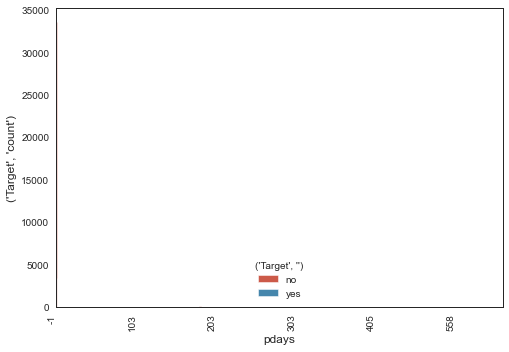

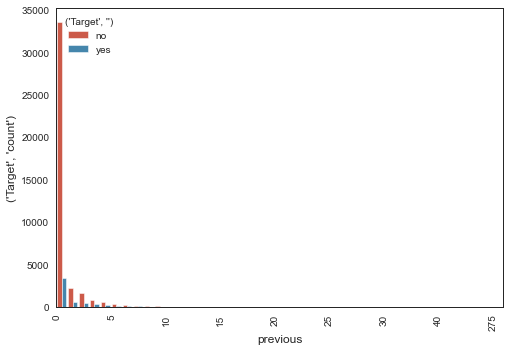

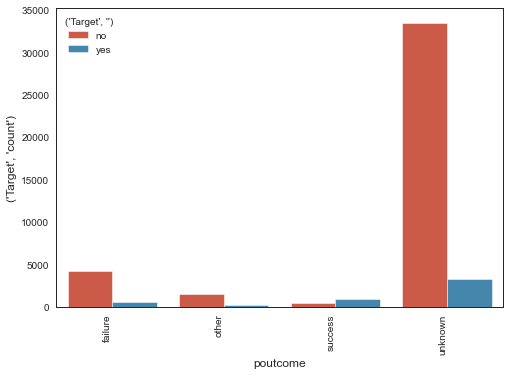

In [32]:
#Get a bivariate analysis of all columns below and the target variable. Try to identify if there is a relation. 
for i in ['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome']:
    p0 = depdata.groupby([i,'Target']).agg({'Target': ['count']}).reset_index()
    ax = sns.barplot(x=i, y=('Target','count'),hue=('Target',''), data=p0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    b = len(ax.get_xticklabels())
    for ind, label in enumerate(ax.get_xticklabels()):
        if b < 30:
            if ind % 1 == 0:  # every 5th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)
        elif b > 100:
            if ind % 100 == 0:  # every 5th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)
        elif b >=30 and b <= 100:
            if ind % 5 == 0:  # every 5th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)
    plt.show()

>* Age distibution and Target distribution seem to move in harmony.
>* Customers with unknown job do not have any subscription to term deposit. 
>* No obvious relation of Target and Marriage, education, housing, personal loan, contact, day, month, campaign, previous, putcome. 
>* All previous outcomes have a postive Target value. this column cannot be dropped.
>* Customers in default do not have any subscription to term deposit. We can drop this column. 
>* pdays does not seem to have any relation with Target. 

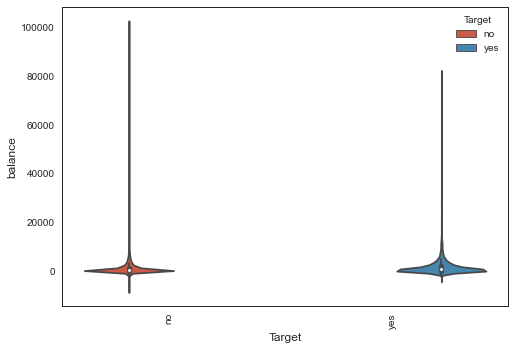

In [33]:
#Relationship of Target is with balance. 
ax = sns.violinplot(x='Target', y='balance',hue='Target', data=depdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* Too many outliers in balance. We can try binning and substitution

In [34]:
depdata['bal_bin1'] = pd.qcut(depdata['balance'], q=15, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
depdata['bal_bin2'] = pd.qcut(depdata['balance'], q=6, labels=['0','1','2','3','4','5'])

>* Create bins for balance and try. 15 bins and 6 bins

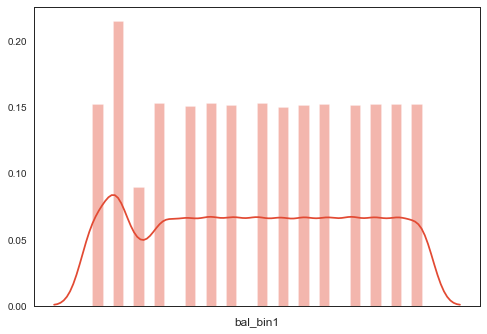

In [35]:
#Check the distribution after binning
ax = sns.distplot(depdata['bal_bin1'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

>* Try 15 auto bins on balance. 

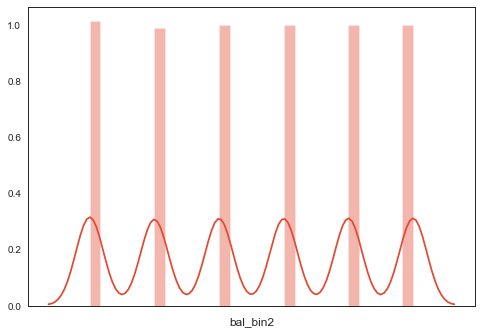

In [36]:
#Check balance distribution after binning
ax = sns.distplot(depdata['bal_bin2'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

>* Try 6 auto bin on balance

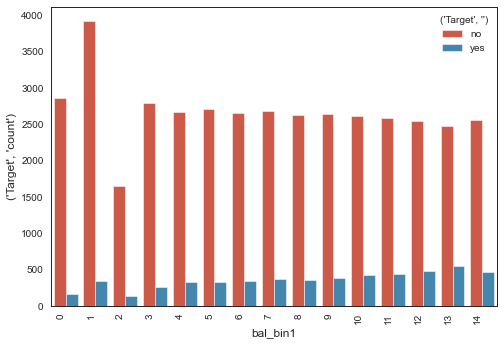

In [37]:
#plot after binning balance (15 bins)
p0 = depdata.groupby(['bal_bin1','Target']).agg({'Target': ['count']}).reset_index()
ax = sns.barplot(x='bal_bin1', y=('Target','count'),hue=('Target',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* It doesnt seem to provide any relation, but we can check if the metrics improve. 

In [38]:
#make a crosstab to see if there is a highlight
pd.crosstab(depdata['bal_bin1'],depdata['Target'],normalize='index')

Target,no,yes
bal_bin1,,
0,0.95,0.05
1,0.92,0.08
2,0.93,0.07
3,0.92,0.08
4,0.89,0.11
5,0.89,0.11
6,0.89,0.11
7,0.88,0.12
8,0.88,0.12


> * There doesnt seem to be any highlight after binning. 

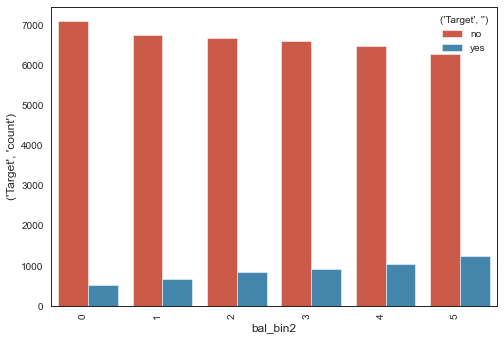

In [39]:
#Plot Target and Binned Balance(6 bins)
p0 = depdata.groupby(['bal_bin2','Target']).agg({'Target': ['count']}).reset_index()
ax = sns.barplot(x='bal_bin2', y=('Target','count'),hue=('Target',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* It doesnt seem to provide any relation, but we can check if the metrics improve. There is a slight increase as the balance increases, but it doesn't seem to stand out. 

In [40]:
#Check if the target has any specific relation to binned balance. 
pd.crosstab(depdata['bal_bin2'],depdata['Target'],normalize='index')

Target,no,yes
bal_bin2,,
0,0.93,0.07
1,0.91,0.09
2,0.89,0.11
3,0.88,0.12
4,0.86,0.14
5,0.83,0.17


>* Both bins are making balance distribution more normalized. However, it doesnt seem to be highlighting anything. Lets if they are working better

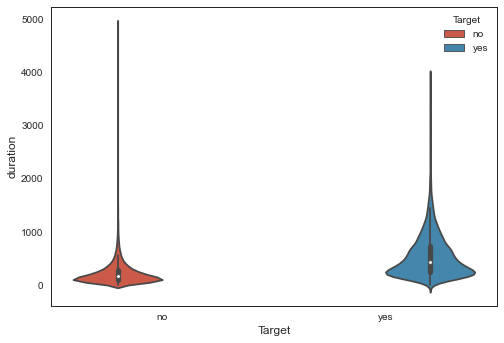

In [41]:
#Target and duration
sns.violinplot(x='Target', y='duration',hue='Target', data=depdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

In [42]:
#Get actual distribution percentage. Check if a certain value is too much outside the box. 
depdata['duration'].value_counts(normalize=True)*100

124    0.42
90     0.41
89     0.39
122    0.39
104    0.39
       ... 
2150   0.00
1970   0.00
1906   0.00
1842   0.00
2015   0.00
Name: duration, Length: 1573, dtype: float64

>* The duration data has high outliers, however the percentage distribution is not disroportionately high for 1 single value. 

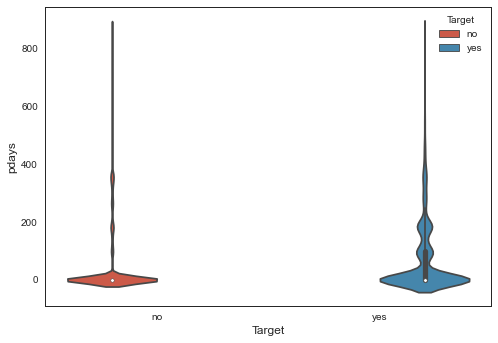

In [43]:
#Relation between Target and pdays
sns.violinplot(x='Target', y='pdays',hue='Target', data=depdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* pdays has a lot of outliers and value -1 has more than 80% of distribution. Convert to bins

In [44]:
#get pdays distibution percentages to make actual sense 
(depdata['pdays'].value_counts(normalize=True)*100).sort_values(ascending=False)

-1     81.74
 182    0.37
 92     0.33
 183    0.28
 91     0.28
        ... 
 437    0.00
 54     0.00
 470    0.00
 854    0.00
 32     0.00
Name: pdays, Length: 559, dtype: float64

>* pdays has a lot of outliers and value -1 has more than 80% of distribution. Convert to bins

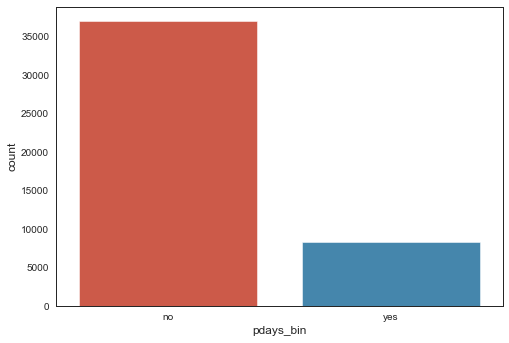

In [45]:
#convert pdays to bins. no designates -1 i.e. customer was not contacted in last 900 days, yes means customer was contacted
bins = [-2,-1,1000]
depdata['pdays_bin'] = pd.cut(depdata['pdays'], bins=bins, labels=['no','yes'])
sns.countplot(depdata['pdays_bin'])

>* Bin pdays to separate out different -1 and others. 

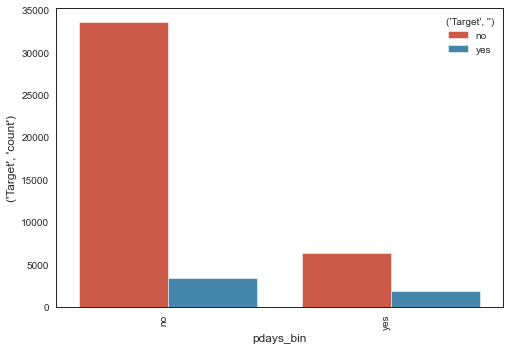

In [46]:
#Relate pdays_bin(binned pdays) and Target
p0 = depdata.groupby(['pdays_bin','Target']).agg({'Target': ['count']}).reset_index()
ax = sns.barplot(x='pdays_bin', y=('Target','count'),hue=('Target',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

> * It can be seen that Target has high likelihood of yes, if there was a previous contact

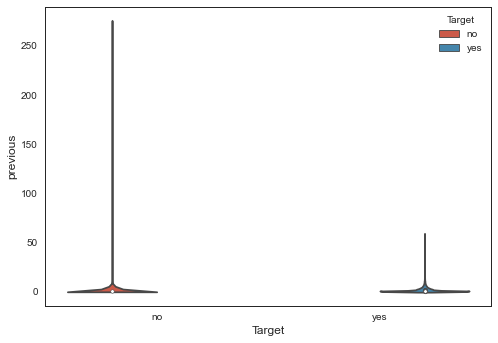

In [47]:
#Plot between Target and previous
sns.violinplot(x='Target', y='previous',hue='Target', data=depdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* previous contacts have high outliers. Infact the violin is not very much visible. 

In [48]:
#Get actual percentage distribution
(depdata['previous'].value_counts(normalize=True)*100).head()

0   81.74
1    6.13
2    4.66
3    2.53
4    1.58
Name: previous, dtype: float64

>* previous column has more than 80% of values as 0. bin to seperate out. It is clear that distribution is heaviliy localized on a single value

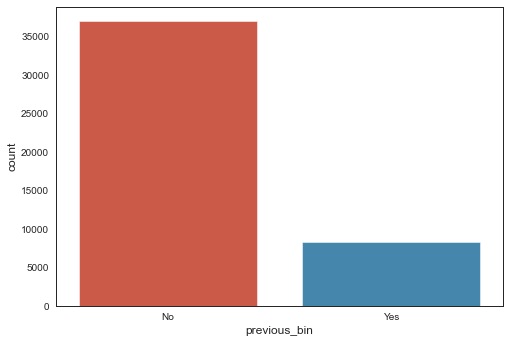

In [49]:
#Convery previous into bin. No means there was no previous contact for the last campaign, Yes means there was a previous contact. 
bins = [-1,0,300]
depdata['previous_bin'] = pd.cut(depdata['previous'], bins=bins, labels=['No','Yes'])
sns.countplot(depdata['previous_bin'])

>* previous is now a more normalized distribution

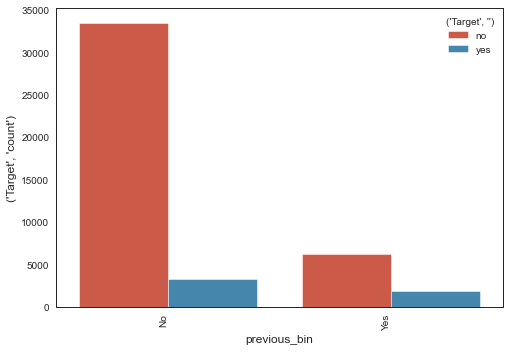

In [50]:
#Plot Target and binned previous
p0 = depdata.groupby(['previous_bin','Target']).agg({'Target': ['count']}).reset_index()
ax = sns.barplot(x='previous_bin', y=('Target','count'),hue=('Target',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
b = len(ax.get_xticklabels())
for ind, label in enumerate(ax.get_xticklabels()):
    if b < 30:
        if ind % 1 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b > 100:
        if ind % 100 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    elif b >=30 and b <= 100:
        if ind % 5 == 0:  # every 5th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.show()

>* Probability of a customer subscribing to a term deposit increases if they had a previous contact. 

## Multivariate Section Summary:
> * Correlation doesn't seem to make a lot of sense in this case as most of the data is categorical
> * Age distibution and Target distribution seem to move in harmony.
> * Customers with unknown job do not have any subscription to term deposit.
> * No obvious relation of Target and Marriage, education, housing, personal loan, contact, day, month, campaign
> * Customers in default do not have any subscription to term deposit. We can try dropping this column.
> * The duration data has high outliers, however the percentage distribution is not disproportionately high for 1 single value.
> * Balance has too many outliers. Binned Balance into 15 and 6 bins to try out. However there is no visible change in its relationship to Target. 
> * pdays have too many outliers. 81% od customers were not contacted in last 900 days. Binned pdays to seperate out customers who were not contacted in last 900 days, and customers who were contacted in last 900 days. It does seem to provide a better view of relationship with Target. 
> * previous has too many outliers. 81% of customers were not contacted for previous campaign. Binned previous to seperate out customers who were not contacted for previous campaign and who were contacted for previous campaign. It does seem to improve and provide a better view of relationship with Target. Just from the view it can be inferred that probability of a customer subscribing to a term deposit increases if they had a previous contact.

# Deliverable – 2 (Prepare the data for analytics) – (10)

In [51]:
#Check columns
depdata1 = depdata
depdata1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'bal_bin1', 'bal_bin2', 'pdays_bin',
       'previous_bin'],
      dtype='object')

In [52]:
#check data types
depdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  object  
 2   marital       45211 non-null  object  
 3   education     45211 non-null  object  
 4   default       45211 non-null  object  
 5   balance       45211 non-null  int64   
 6   housing       45211 non-null  object  
 7   loan          45211 non-null  object  
 8   contact       45211 non-null  object  
 9   day           45211 non-null  int64   
 10  month         45211 non-null  object  
 11  duration      45211 non-null  int64   
 12  campaign      45211 non-null  int64   
 13  pdays         45211 non-null  int64   
 14  previous      45211 non-null  int64   
 15  poutcome      45211 non-null  object  
 16  Target        45211 non-null  object  
 17  bal_bin1      45211 non-null  category
 18  bal_bi

> * Most datatype are objects. Binned columns were created as category columns. 

In [53]:
depdata1 = depdata
depdata1.drop(['pdays','previous','bal_bin2','bal_bin1'],axis=1,inplace=True)

### Highlights
> **Drop pdays, previous, bal_bin2, bal_bin1.**  
> **pdays bin and previous bin seems to be increasing overall model score. so dropping original columns**  
> **Tried dropping default but it seems to reduce model scores.**  
> **Tried with balance bins both bin1 and bin2, but they seem to have no effect on the score.**  

In [54]:
#Convert columns below in categorical, so that one hot encoding can be applied on these columns
for col in ['job', 'marital', 'education', 'housing','default', 'pdays_bin','previous_bin',
       'loan', 'contact', 'month','poutcome']:
    depdata1[col] = depdata1[col].astype('category')

In [55]:
#Apply one hot encoding on all categorical columns. 
depdata1 = pd.get_dummies(depdata1, drop_first=True)

In [56]:
#display columns after applying one hot encoding
depdata1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'Target_yes', 'pdays_bin_yes', 'previous_bin_Yes'],
      dtype='object')

In [57]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in depdata1.columns if col != 'Target_yes']

X_train, X_test, y_train, y_test = train_test_split(depdata1[features], depdata1['Target_yes'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((31647, 42), (13564, 42))

> * data shows training and test division

## Deliverable – 3 (create the ensemble model) – (30)

## Logistic Regression

In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 

model_log = LogisticRegression(random_state=22)
model_log.fit(X_train,y_train)
model_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#predict outcome of test data
pred_LR =  model_log.predict(X_test)

In [60]:
#confusion matrix function definition
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

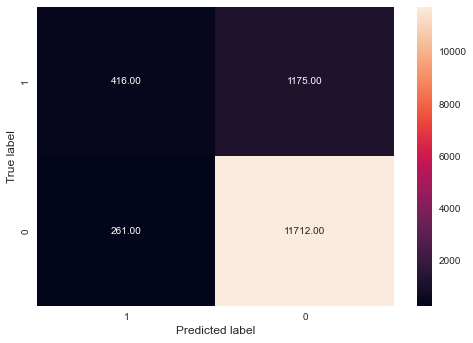

In [61]:
#confusion matrix on Logistic Regression
draw_cm(y_test, pred_LR)

> * Confusion Matrix shows that there are high number of false negatives, but a higher percentage of false positives. 

In [62]:
# Visualize model performance with yellowbrick library
def cls_roc(model):
    viz = ClassificationReport(model)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()
    roc = ROCAUC(model)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

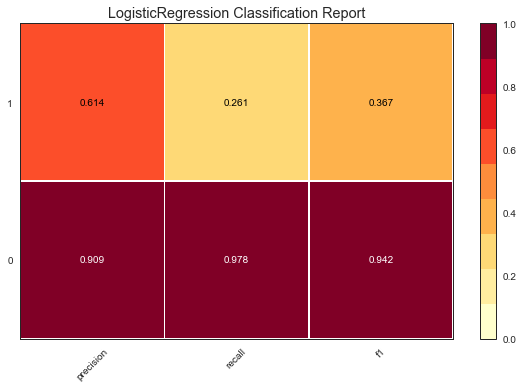

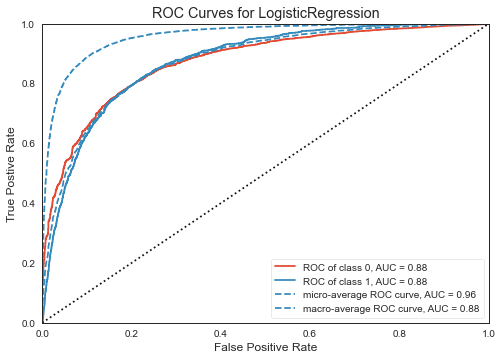

In [63]:
cls_roc(LogisticRegression(random_state=22))

>* From this model it can be seen that we were able to predict negative outcome with 91% precision, and positive outcome with 61% precision.

In [64]:
from sklearn import metrics
#make a dataframe to store metrics and compare at the end. 
results = pd.DataFrame()
def metmod(i, desc, pred):
    #resultsDf = {}
    global resultsDf1 
    resultsDf1 = pd.DataFrame({'Method':[desc], 
    'accuracy':metrics.accuracy_score(y_test, pred, normalize=True, sample_weight=None),
    'balanced accuracy':metrics.balanced_accuracy_score(y_test, pred),
    'f1 score':metrics.f1_score(y_test, pred, average='weighted'),
    'precision':metrics.precision_score(y_test, pred, average='weighted'),
    'recall':metrics.recall_score(y_test, pred, average='weighted'),
    'roc_auc':metrics.roc_auc_score(y_test, pred)}, index=[i])
    resultsDf1 = resultsDf1[['Method', 'accuracy','balanced accuracy','f1 score','precision','recall','roc_auc']]
    #resultsDf.concat(resultsDf1)
    resultsDf1.append([resultsDf1])
    return resultsDf1
metmod(1, 'Logistic Regression', pred_LR)
results = results.append(resultsDf1)
results
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836


> **Logistic Regression has total balanced accuracy of 62%**

## Decision Trees

In [65]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


In [67]:
#prune tree to reduce overfitting of data set depth to 4
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [69]:
#display training split
y_train.value_counts()

0    27949
1     3698
Name: Target_yes, dtype: int64

In [70]:
#import additional libraries to display prunded tree. This may not work on all machines. 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

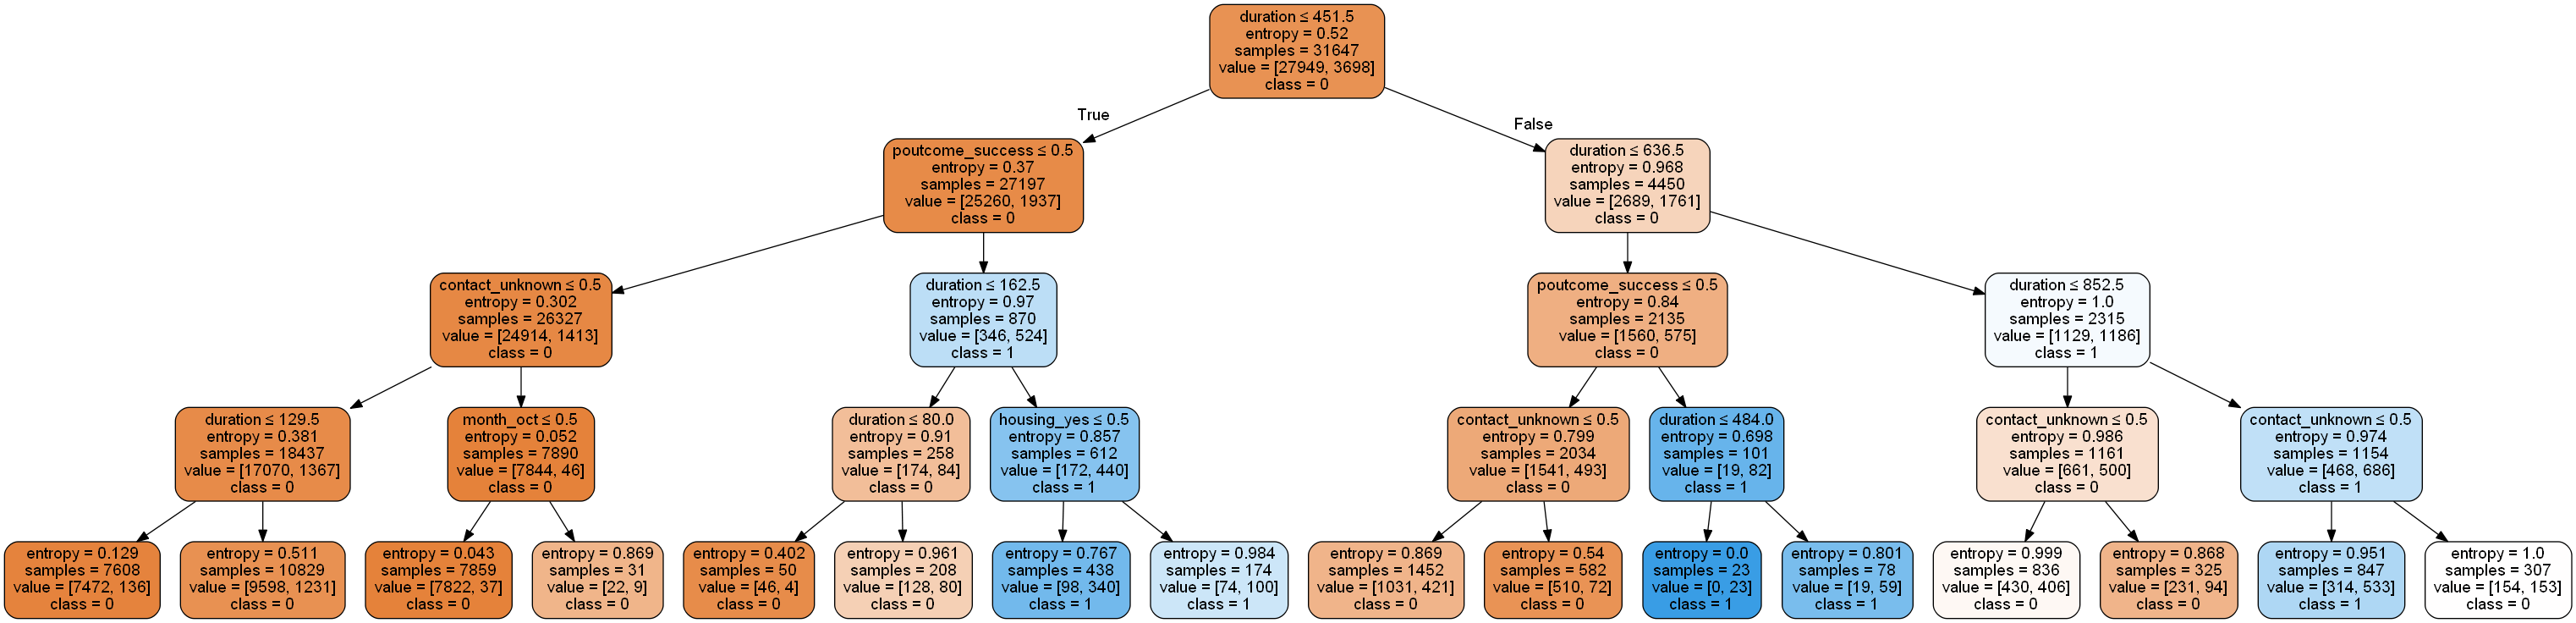

In [71]:
#tree display
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Target_pruned.png')
Image(graph.create_png())

In [72]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

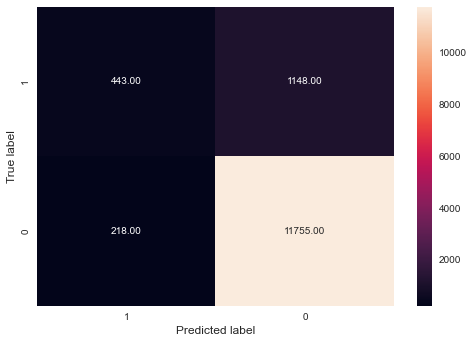

In [73]:
# Confusion matrix
draw_cm(y_test, preds_test)

> * For Decision Trees, the model still shows a very high number of false negatives, but a higher percentage of false positives. 

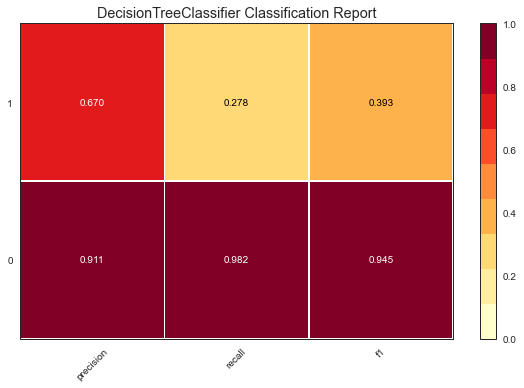

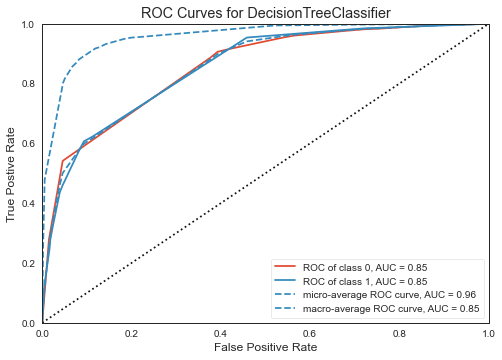

In [74]:
# Visualize model performance with yellowbrick library
cls_roc(DecisionTreeClassifier(criterion = "entropy", max_depth=4))

>* Decision Trees have a precision of 91% for negative outcome and 67% for positive outcome. 

In [75]:
#Add probability values to compare how the model performed
depdata1['ProbQuality_0'] = clf_pruned.predict_proba(depdata1[features])[:,0]
depdata1['ProbQuality_1'] = clf_pruned.predict_proba(depdata1[features])[:,1]
depdata1.head(10)

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes,pdays_bin_yes,previous_bin_Yes,ProbQuality_0,ProbQuality_1
0,58,2143,5,261,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.00,0.00
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00
2,33,2,5,76,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00
3,47,1506,5,92,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00
5,35,231,5,139,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.00,0.00
6,28,447,5,217,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.00,0.00
7,42,2,5,380,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00
8,58,121,5,50,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1.00,0.00
9,43,593,5,55,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.00,0.00


In [76]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.59
poutcome_success,0.28
contact_unknown,0.12
month_oct,0.01
housing_yes,0.00
age,0.00
month_jul,0.00
contact_telephone,0.00
month_aug,0.00
month_dec,0.00


>* Most important attributes are duration, poutcome, contact

In [77]:
metmod(2, 'Decision Trees', preds_test)
results = results.append(resultsDf1)
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117


> **Decision Trees have 63% of balanced accuracy score**

## Random Forest Algorithm

In [78]:
#Run model fit
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [79]:
#Predict Output
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

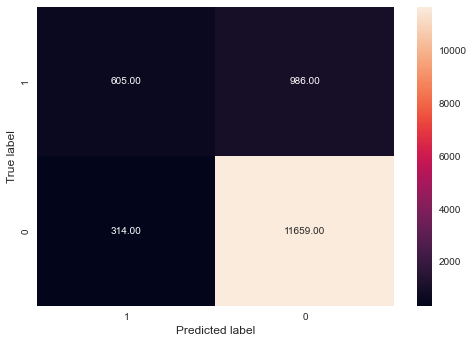

In [80]:
draw_cm(y_test, pred_RF)

>* High false negatives but higher percentage of false positives. 

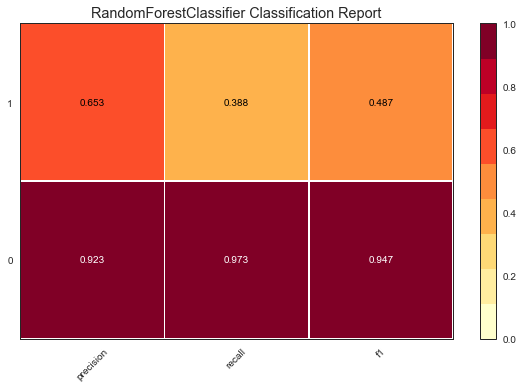

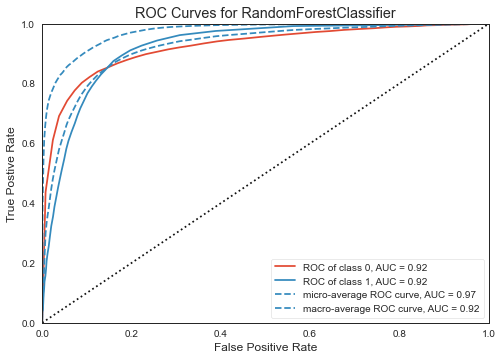

In [81]:
# Visualize model performance with yellowbrick library
cls_roc(RandomForestClassifier(n_estimators = 50))

>* Random Forest have a higher precision than Decision Trees and Logistic Regression. For class 0, its its 92% and for class 1 its 65%

In [82]:
metmod(3, 'Random Forest', pred_RF)
results = results.append(resultsDf1)
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117
3,Random Forest,0.904158,0.677019,0.892636,0.891094,0.904158,0.677019


> **Random Forest has a balanced accuracy score of 67.7%**

## Adaptive Boosting

In [83]:
#fit Adaboosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [84]:
#get prediction values and score
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

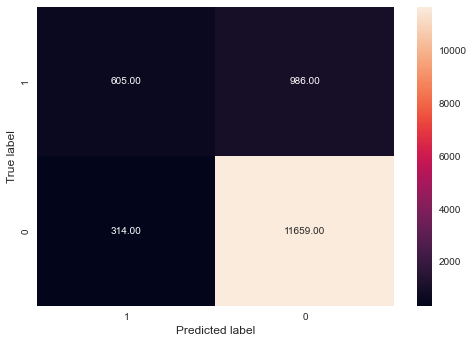

In [85]:
draw_cm(y_test, pred_RF)

> * High number of false negatives, but a higher percentage of false positives

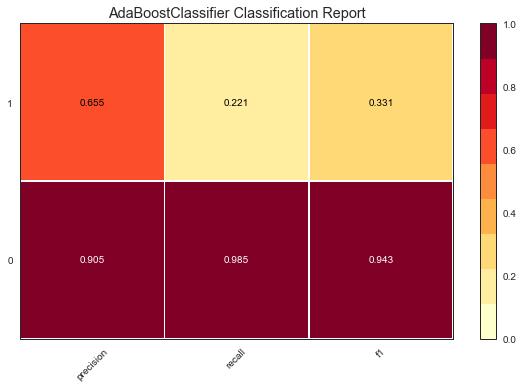

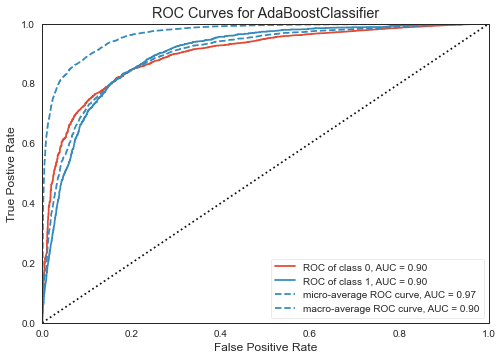

In [86]:
# Visualize model performance with yellowbrick library
cls_roc(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))

> * Adaboost has lower precision than Random Forest. For class 0, its its 90% and for class 1 its 65%

In [87]:
metmod(4, 'Adaboost', pred_AB)
results = results.append(resultsDf1)
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117
3,Random Forest,0.904158,0.677019,0.892636,0.891094,0.904158,0.677019
4,Adaboost,0.895016,0.602897,0.871230,0.875637,0.895016,0.602897


> **Adaboost balanced accuract is around 60%, which is lower than Random Forest**

## Bagging

In [88]:
#run bagging fit
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [89]:
#predict output
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

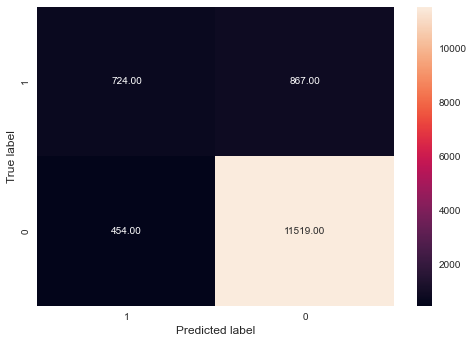

In [90]:
draw_cm(y_test, pred_BG)

> * High false negatives, but lowest compared to all other. High percentage of false positives, but lowest compared to all others. 

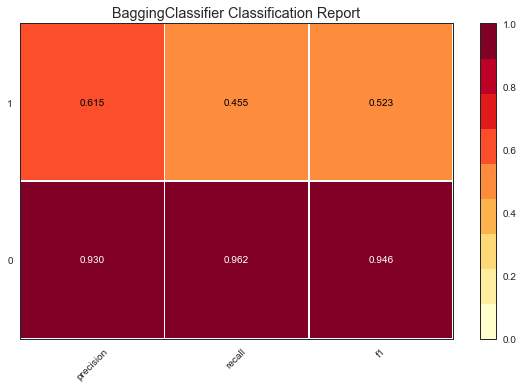

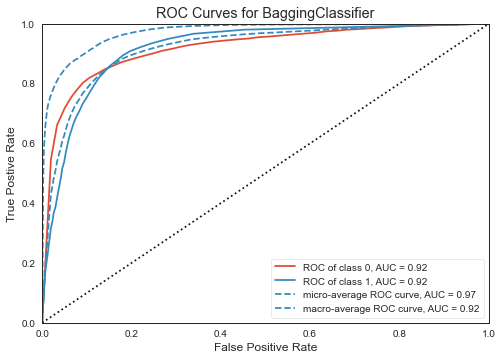

In [91]:
# Visualize model performance with yellowbrick library
cls_roc(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))

> * Precision is 93% for class 0, and 61% for class 1. 

In [92]:
metmod(5, 'Bagging', pred_BG)
results = results.append(resultsDf1)
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117
3,Random Forest,0.904158,0.677019,0.892636,0.891094,0.904158,0.677019
4,Adaboost,0.895016,0.602897,0.871230,0.875637,0.895016,0.602897
5,Bagging,0.902610,0.708571,0.896173,0.893006,0.902610,0.708571


> **Bagging balanced accuracy is ~71%, which is highest till now**

## Gradient Boosting

In [93]:
#run Gradient Boost fit
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [94]:
# predict outcome
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

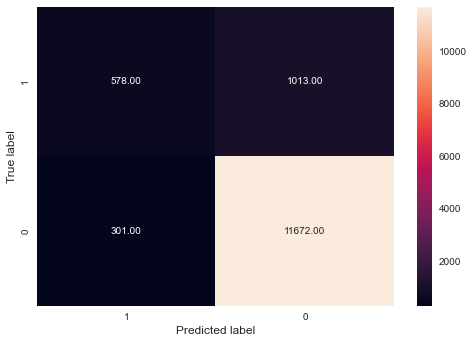

In [95]:
draw_cm(y_test,pred_GB)

> * High false negatives, but a higher percentage of false positives

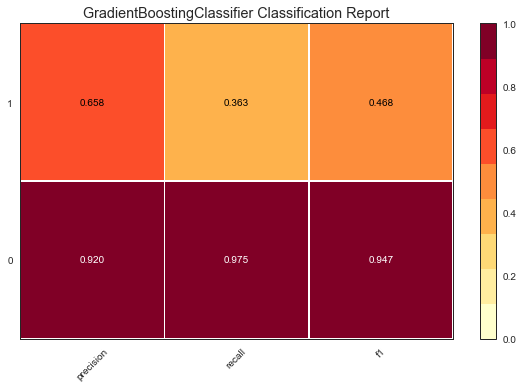

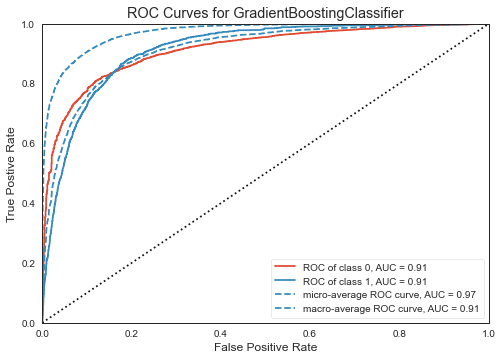

In [96]:
# Visualize model performance with yellowbrick library
cls_roc(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

> * Precision for class 0 is 92%, and for class 1 is 65.8%

In [97]:
metmod(6, 'Gradient Boost', pred_GB)
results = results.append(resultsDf1)
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117
3,Random Forest,0.904158,0.677019,0.892636,0.891094,0.904158,0.677019
4,Adaboost,0.895016,0.602897,0.871230,0.875637,0.895016,0.602897
5,Bagging,0.902610,0.708571,0.896173,0.893006,0.902610,0.708571
6,Gradient Boost,0.903126,0.669077,0.890562,0.889343,0.903126,0.669077


> **Gradient boost has a good recall of 90%, but balanced accuracy of only 66%**

### Conclusion
* To understand which algorithm is the best, we need to first understand what is the criteria we need to be looking at to identify the best fit model. 
* Goal is to use the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

> THE WHY: What is the reason to for this requirement or why would we want to increase the hit ratio? 
>> * Assumptions: 
>>> * There is a higher cost associated to run a campaign for all customers. so it becomes important to target customers who are more likely to subscribe and increase hit ratio. This also gives the bank clarity on how can the term deposit be more personalized to needs of the customers who are more likely to subscribe to it. 
>>> * If we choose to take Balanced Accuracy/ROC/AUC(Area Under Curve) as the most important metric, that would mean we are looking at most optimized values of precision and recall. So we need to evaluate between F1 score and AUC. 
>>> 

> THE HOW: We have used multiple techniques here to predict whether a customer is likely to subscribe to a term deposit. That includes:
>> * Logistic Regression
>> * Decision Tress
>> * Random Forest
>> * Adaptive Boosting
>> * Bagging
>> * Gradient Descent

> How do parameters match up to criteria? 
>> * Lower False Positives equate to a higher precision(Measure of correctness of all positive classes)
>> * Lower False Negatives equate to a higher recall(Measure of correctness of all classes)
>> * Accuracy is a blanket criteria and determines % of correct predictions. 
>> * F1 score(Harmonic mean of precision and recall)
>> * ROC/AUC(Plot between True Positive Rate and False Positive Rate)

>> **In our case balanced accuracy and f1 score have the highest weightage**

## Analysis on results

In [98]:
results.style.background_gradient(cmap='gist_earth')

,Method,accuracy,balanced accuracy,f1 score,precision,recall,roc_auc
1,Logistic Regression,0.894132,0.619836,0.874745,0.874297,0.894132,0.619836
2,Decision Trees,0.899292,0.630117,0.880380,0.882780,0.899292,0.630117
3,Random Forest,0.904158,0.677019,0.892636,0.891094,0.904158,0.677019
4,Adaboost,0.895016,0.602897,0.871230,0.875637,0.895016,0.602897
5,Bagging,0.902610,0.708571,0.896173,0.893006,0.902610,0.708571
6,Gradient Boost,0.903126,0.669077,0.890562,0.889343,0.903126,0.669077


# Winner
#### Based on the metrics given above and our assumption that balanced accuracy and f1 score are the most important criteria , and taking into account Balanced Accuracy, F1 Score, Precision, Recall, AUC 
### Bagging is the clear winner and takes the title of being the best model.

### If only recall and accuracy is considered, Random Forest wins the bet.